In [1]:
using Plots, Parameters

# NOT DONE

In [2]:
@with_kw mutable struct Lorenz
        
    σ::Float64 = 10
    ρ::Float64 = 28
    β::Float64 = 8/3
    
    x::Float64 = 1 # Initial condition x
    y::Float64 = 1 # Initial condition y
    z::Float64 = 1 # Initial condition z
    
    
end

Lorenz

In [3]:
dt = 0.02
t = 0:dt:10
n = length(t)
f = zeros(3,n)

3×501 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [4]:
function SolveLorenz(l::Lorenz, dt, f, n)
    
    # Using Euler Method to solve it
    
    
    
    f[1,1] = l.x
    f[2,1] = l.y
    f[3,1] = l.z
    
    
    
    for i in 2:n
        
        dx = l.σ * (f[2,i-1] - f[1,i-1])
        dy = f[1,i-1] * (l.ρ - f[3,i-1]) - f[2,i-1]
        dz = f[1,i-1] * f[2,i-1] - l.β * f[3,i-1]
        
        f[1,i] = f[1,i-1] + dt * dx
        f[2,i] = f[2,i-1] + dt * dy
        f[3,i] = f[3,i-1] + dt * dz
        
    end
    
    return f
    
end

SolveLorenz (generic function with 1 method)

In [5]:
l = Lorenz()

var = SolveLorenz(l::Lorenz, dt,f,n)


3×501 Matrix{Float64}:
 1.0  1.0       1.104     1.28925   1.54881  …   2.95436   2.95269   3.02545
 1.0  1.52      2.03027   2.58702   3.23303      2.946     3.3165    3.73436
 1.0  0.966667  0.945511  0.939912  0.95649     20.7324   19.8008   18.9406

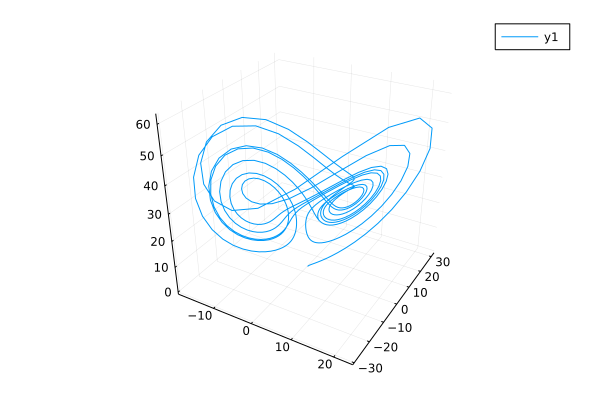

In [6]:
plot(var[1,:],var[2,:],var[3,:])
# THIS PLOT IS WRONG

┌ Info: Saved animation to 
│   fn = /home/arturo/Julia-Studies/Julia Basics/figures/Lorenz_without@userplo.gif
└ @ Plots /home/arturo/.julia/packages/Plots/OeNV1/src/animation.jl:126


Plots.AnimatedGif("/home/arturo/Julia-Studies/Julia Basics/figures/Lorenz_without@userplo.gif")
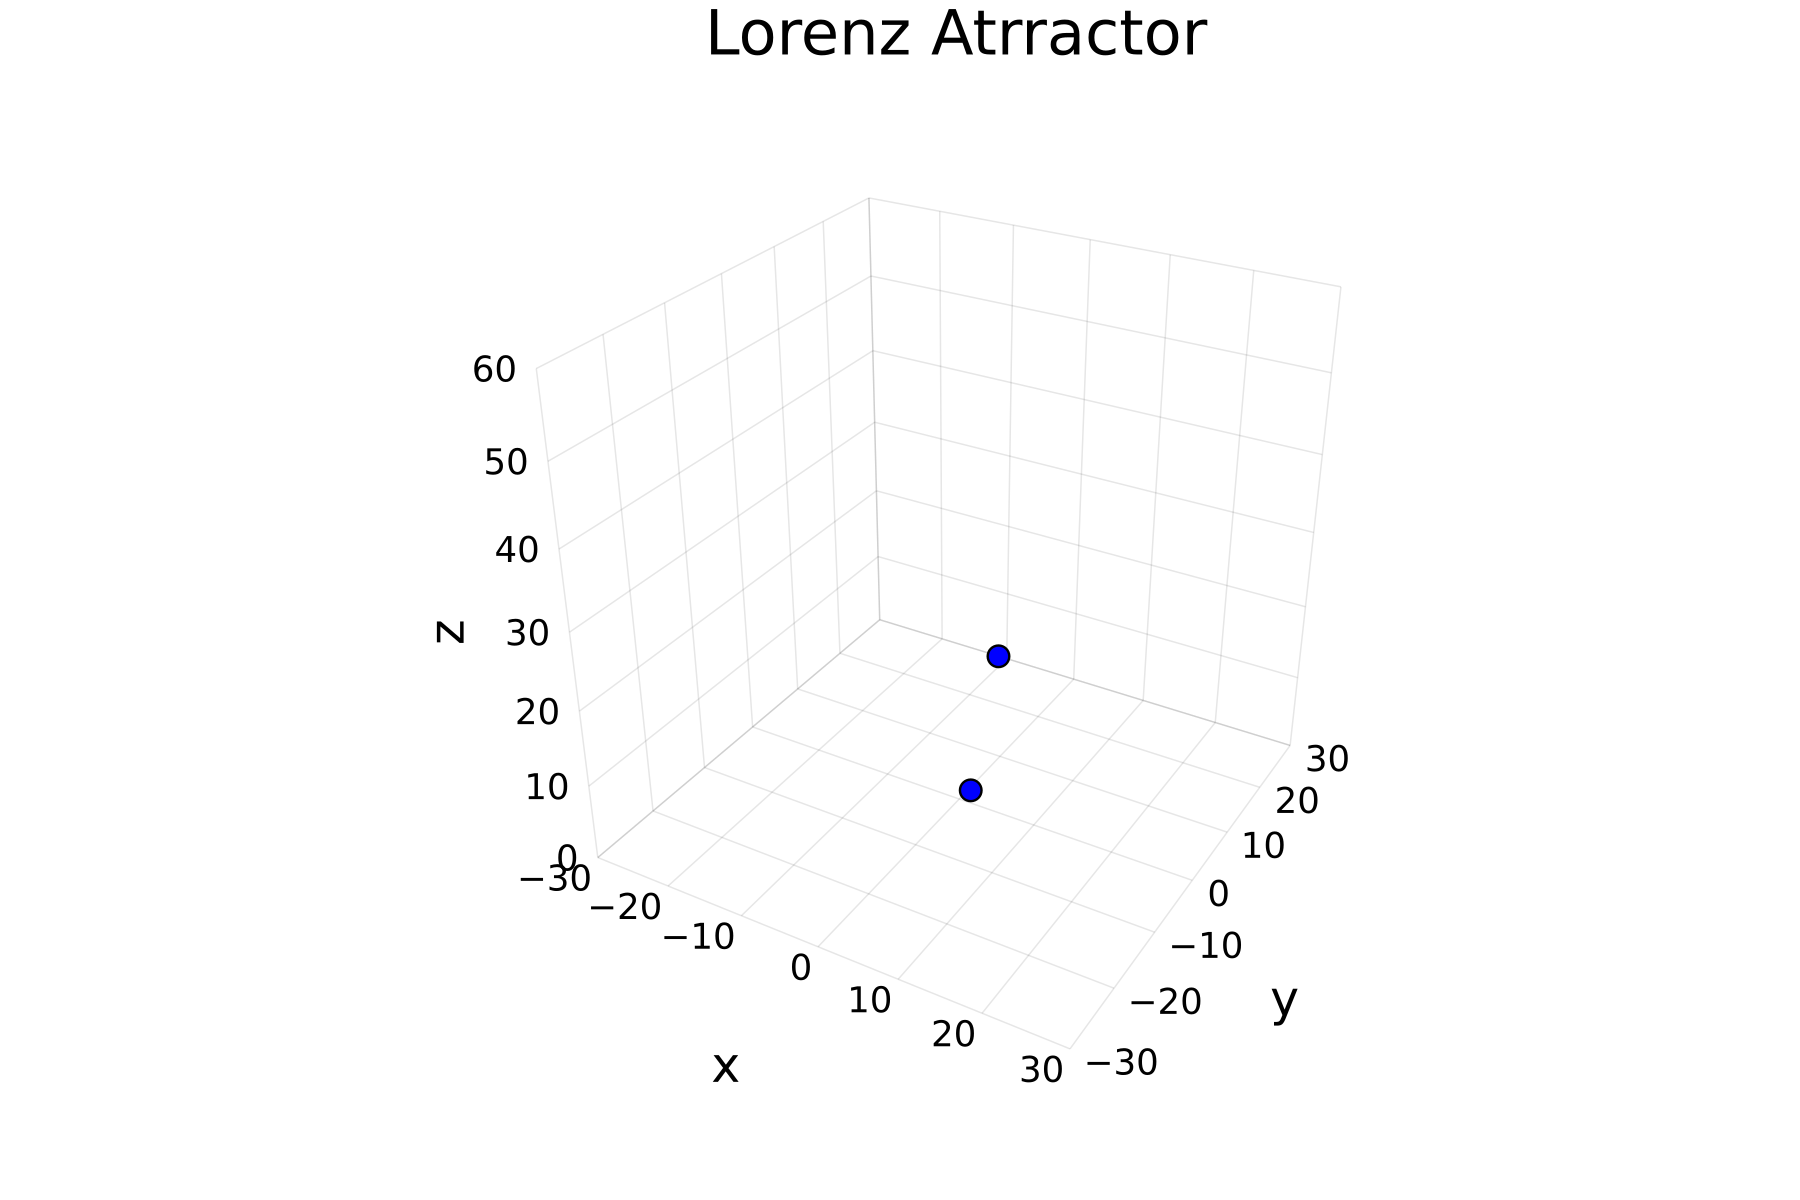

In [9]:
anim = @animate for i in 1:n
        
        scatter!([f[1,i]], [f[2,i]], [f[3,i]], legend = :none, title = "Lorenz Atrractor", 
            makersize = 2, markercolor = "blue", 
            xaxis = ("x", (-30,30)), yaxis = ("y", (-30,30)), zaxis = ("z", (0,60)),
            framestyle = :grid, aspect_ratio = 1, dpi = 300)
    end
    
gif(anim, "figures/Lorenz_without@userplo.gif", fps = 5)

┌ Info: Saved animation to 
│   fn = /home/arturo/Julia-Studies/Julia Basics/figures/Lorenz.gif
└ @ Plots /home/arturo/.julia/packages/Plots/OeNV1/src/animation.jl:126


Plots.AnimatedGif("/home/arturo/Julia-Studies/Julia Basics/figures/Lorenz.gif")
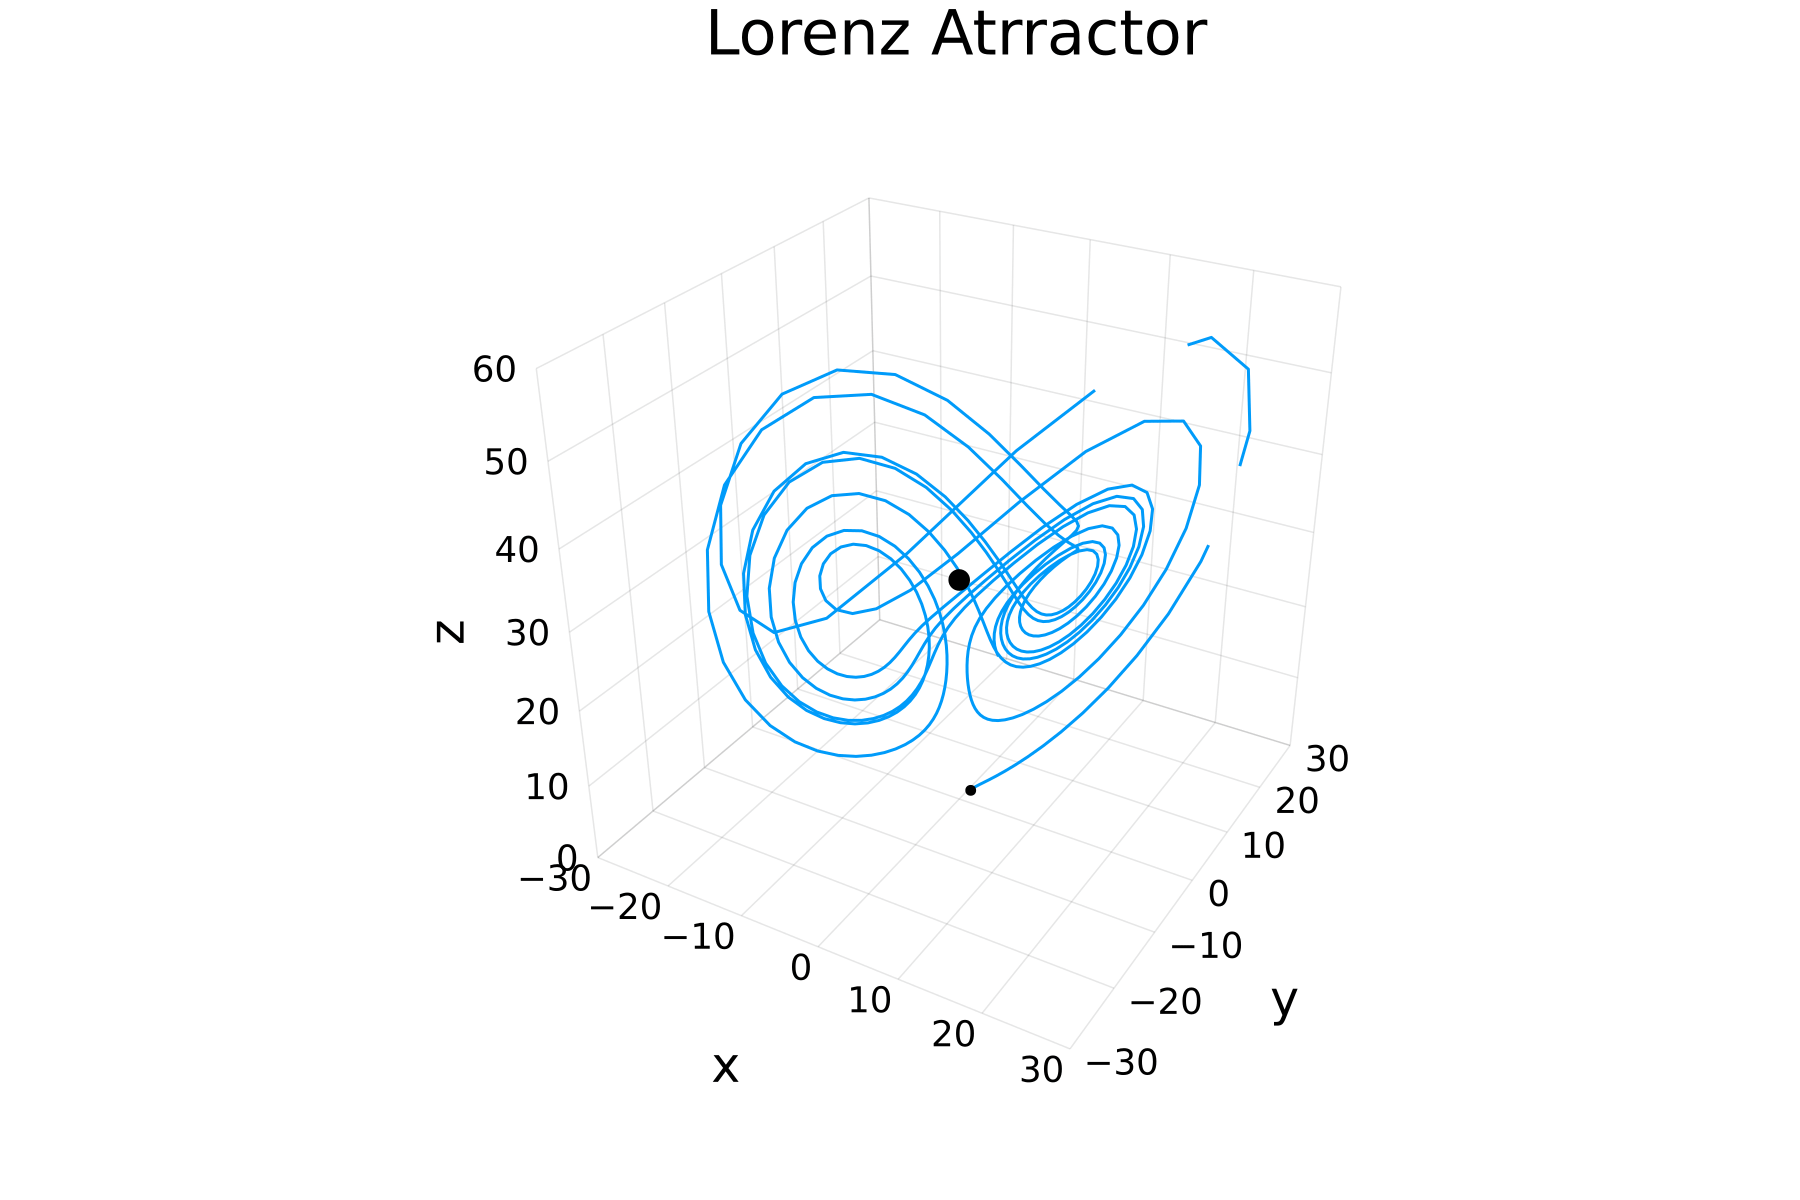

In [7]:
@userplot attractor
@recipe function f!(var::attractor)
    x, y , z = var.args
    title --> "Lorenz Atrractor"
    xaxis --> ("x", (-30, 30))
    yaxis --> ("y", (-30, 30))
    zaxis --> ("z", (0, 60))
    markersize --> 2
    makercolor --> "black"
    seriestype --> :scatter
    legend --> :none
    framestyle --> :grid
    aspect_ratio --> 1
    dpi --> 300
    return [x], [y], [z]
    #or return x, y. However in this case when calling orbitain function I would have to put the arguments in []
end


anim = @animate for i in 1:n
        
        attractor!(f[1,i], f[2,i], f[3,i], markercolor = :black)# SEE EXPLANATION IN RETURN ARGUMENT OF THE MACRO
        scatter!((0, 0),markercolor = :black)
    end
     
gif(anim, "figures/Lorenz.gif", fps = 15)